In [14]:
import math
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [15]:
ticker = 'AAPL '     # ticker del titolo
T = 25           # giorni a scadenza
r = 0.03       # tasso risk free
N = 10     # numero stadi
K = 250   # strike price
g=100   # numero di sentieri simulati

dt=(T/N)*(1/365)
data = yf.download(ticker, period='1y', interval='1d')  # scarichiamo i dati
prezzi_chiusura = data['Close'].values
S0 = prezzi_chiusura[-1]
v = prezzi_chiusura[-30:]
var = np.std(v) * 0.01       # varianza calcolata sugli ultimi 30 giorni


[*********************100%***********************]  1 of 1 completed


In [16]:
def metodoMonteCarlo(T,S0,K,r,N,g,var,type = "Call") :

  # inizializziamo la matrice dei prezzi
  prezzi = np.zeros((g, N + 1))
  prezzi[:, 0] = S0

  dt=T/N * 1/365

  if type == "Call" :

    # popoliamo la matrice dei prezzi
    for i in range(g):
      for t in range (1, N+1):
        epsilon_i = np.random.normal(0, 1)    #generiamo la nostra variabile casuale dalla normale standardizzata
        prezzi[i, t] = prezzi[i, t-1] * ((math.exp((r - ((var**2)/2)) * dt) + (var * epsilon_i * math.sqrt(dt)))**N)
    Valori_finali_opzione = []
    for i in range(g):
      Valore_finale_opzione = max(prezzi[i,N] - K,0)    # ci interessano solo i prezzi finali del sottostante per calcolare il valore dell'opzione
      Valori_finali_opzione.append(Valore_finale_opzione)

    valore_opzione_call = np.mean(Valori_finali_opzione) * np.exp(-r*T/365)

    return(prezzi, valore_opzione_call)

  elif type == "Put" :

    for i in range(g):
      for t in range (1, N+1):
        epsilon_i = np.random.normal(0, 1)    #generiamo la nostra variabile casuale dalla normale standardizzata
        prezzi[i, t] = prezzi[i, t-1] * ((math.exp(((r - (var**2)/2) * dt) + (var * epsilon_i * math.sqrt(dt))))**N)
    Valori_finali_opzione = []
    for i in range(g):
      Valore_finale_opzione = max(prezzi[i,N] - K,0)    # ci interessano solo i prezzi finali del sottostante per calcolare il valore dell'opzione
      Valori_finali_opzione.append(Valore_finale_opzione)

    valore_opzione_put = np.mean(Valori_finali_opzione) * np.exp(-r*T/365)
    return (prezzi, valore_opzione_put)



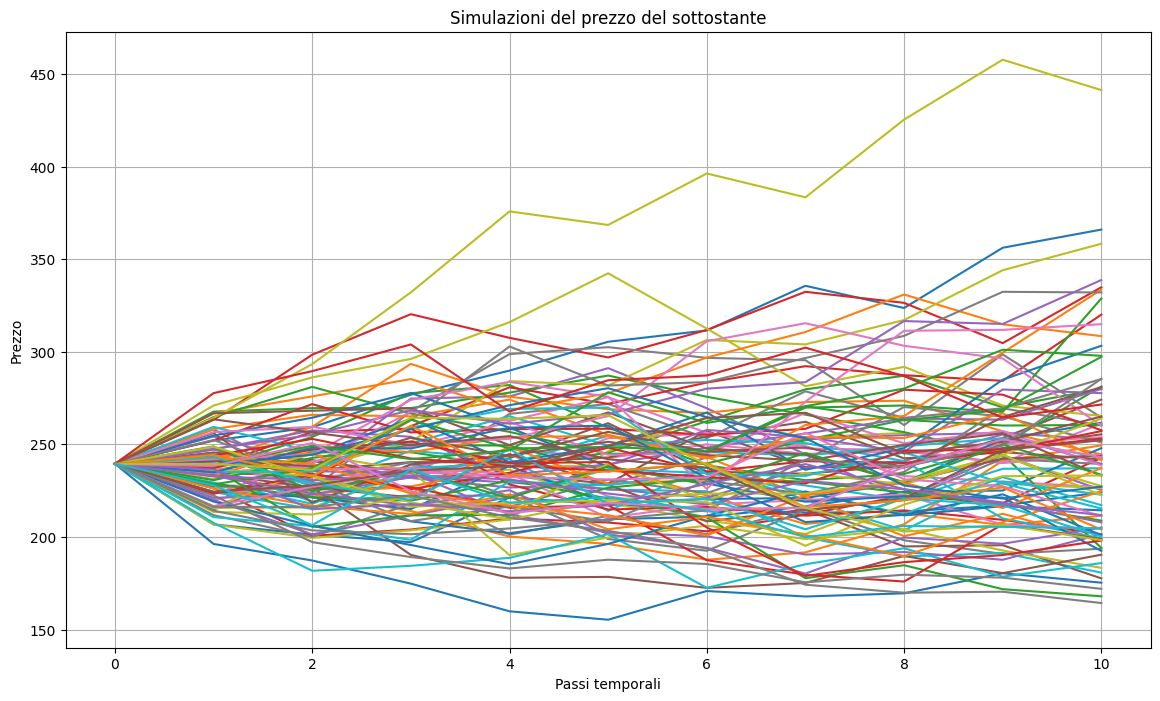

In [17]:

prezzi, c= metodoMonteCarlo(T,S0,K,r,N,g,var,type = "Call")
plt.figure(figsize=(14, 8))
for i in range(g):
    plt.plot(prezzi[i, :], label=f"Simulazione {i+1}")

plt.title("Simulazioni del prezzo del sottostante")
plt.xlabel("Passi temporali")
plt.ylabel("Prezzo")
plt.grid(True)
plt.show()